![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [18]:
# Start your code here!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
alpha=0.01

men = pd.read_csv("men_results.csv", index_col=0)
women = pd.read_csv('women_results.csv', index_col=0)

In [19]:
men.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11-30,Scotland,England,0,0,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly


In [20]:
women.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1969-11-01,Italy,France,1,0,Euro
1,1969-11-01,Denmark,England,4,3,Euro
2,1969-11-02,England,France,2,0,Euro
3,1969-11-02,Italy,Denmark,3,1,Euro
4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [21]:
#We perform data cleaning and preparing for the next steps

In [22]:
WC_men = men[men['tournament'] == 'FIFA World Cup']
WC_men['date'] = pd.to_datetime(men['date'])
WC_men = WC_men[WC_men['date'] > '2002-01-01']
WC_men['total_goals_per_match'] = WC_men['home_score']+WC_men['away_score']
WC_men.head()

,date,home_team,away_team,home_score,away_score,tournament,total_goals_per_match
25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1
25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8
25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2
25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3
25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1


In [23]:
WC_women = women[women['tournament'] == 'FIFA World Cup']
WC_women['date'] = pd.to_datetime(women['date'])
WC_women = WC_women[WC_women['date'] > '2002-01-01']
WC_women['total_goals_per_match'] = WC_women['home_score']+WC_women['away_score']
WC_women.head()

,date,home_team,away_team,home_score,away_score,tournament,total_goals_per_match
1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3
1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2
1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5
1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6
1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4


In [24]:
#Hypothesis testing

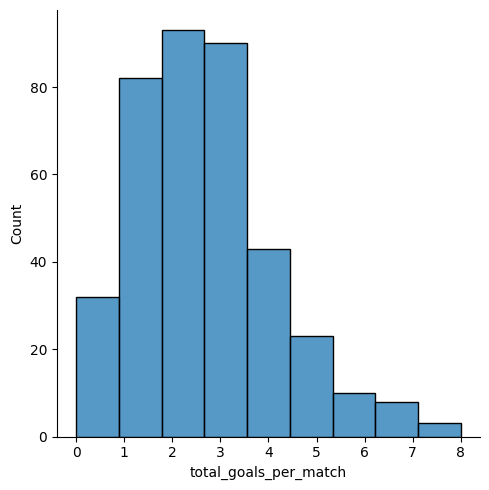

In [25]:
sns.displot(data = WC_men, x='total_goals_per_match', bins=9)

In [26]:
#Not sure about the normality of the data, let's do a Shapiro-Wilk test with scipy.stats
#H0 : population is normally distributed
#H1 : population not normally distributed
#alpha=0.01 (rappel)
from scipy import stats
print(stats.shapiro(WC_men['total_goals_per_match']))

ShapiroResult(statistic=0.9266489744186401, pvalue=8.894154401688226e-13)


In [27]:
#p-value<alpha => population not normally distributed
#What about the population for the women's world cup
print(stats.shapiro(WC_women['total_goals_per_match']))

ShapiroResult(statistic=0.8491013050079346, pvalue=3.8905201759850683e-13)


In [28]:
#Same result as for the men's world cup, p-value<alpha => not normally distributed
#We will use a Mann-Whitney-Wilcoxon test to determine if the mean number of goals scored in women's international soccer matches is the same as men's

In [29]:
res = stats.mannwhitneyu(x=WC_women['total_goals_per_match'], y=WC_men['total_goals_per_match'], alternative='greater')
print(res)

MannwhitneyuResult(statistic=43273.0, pvalue=0.005106609825443641)


In [30]:
res[1]<alpha #True thus H0 is rejected, mean number of goals are different between men and women during the world cul

True

In [31]:
result_dict = {
    "p_val" : res[1],
    "result" : "reject"
}